In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Heart  Attack Analysis

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [2]:
!head heart.csv

In [3]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Clasificación

In [4]:
# Crea un dataframe con los predictores
predictors = list(data.keys())
predictors.remove('output')
print(predictors, np.shape(np.array(predictors)))

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall'] (13,)


In [5]:
# Separa entre train & test
import sklearn.model_selection

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
                                    data[predictors], data['output'], test_size=0.5)

In [6]:
# Importa sklearn
import sklearn.ensemble

In [7]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=10)

In [8]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [9]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=311868334),
 DecisionTreeClassifier(max_features='auto', random_state=1987928120),
 DecisionTreeClassifier(max_features='auto', random_state=1280401448),
 DecisionTreeClassifier(max_features='auto', random_state=1915570887),
 DecisionTreeClassifier(max_features='auto', random_state=251572768),
 DecisionTreeClassifier(max_features='auto', random_state=560226711),
 DecisionTreeClassifier(max_features='auto', random_state=1650228516),
 DecisionTreeClassifier(max_features='auto', random_state=52787975),
 DecisionTreeClassifier(max_features='auto', random_state=1311248122),
 DecisionTreeClassifier(max_features='auto', random_state=1072305342)]

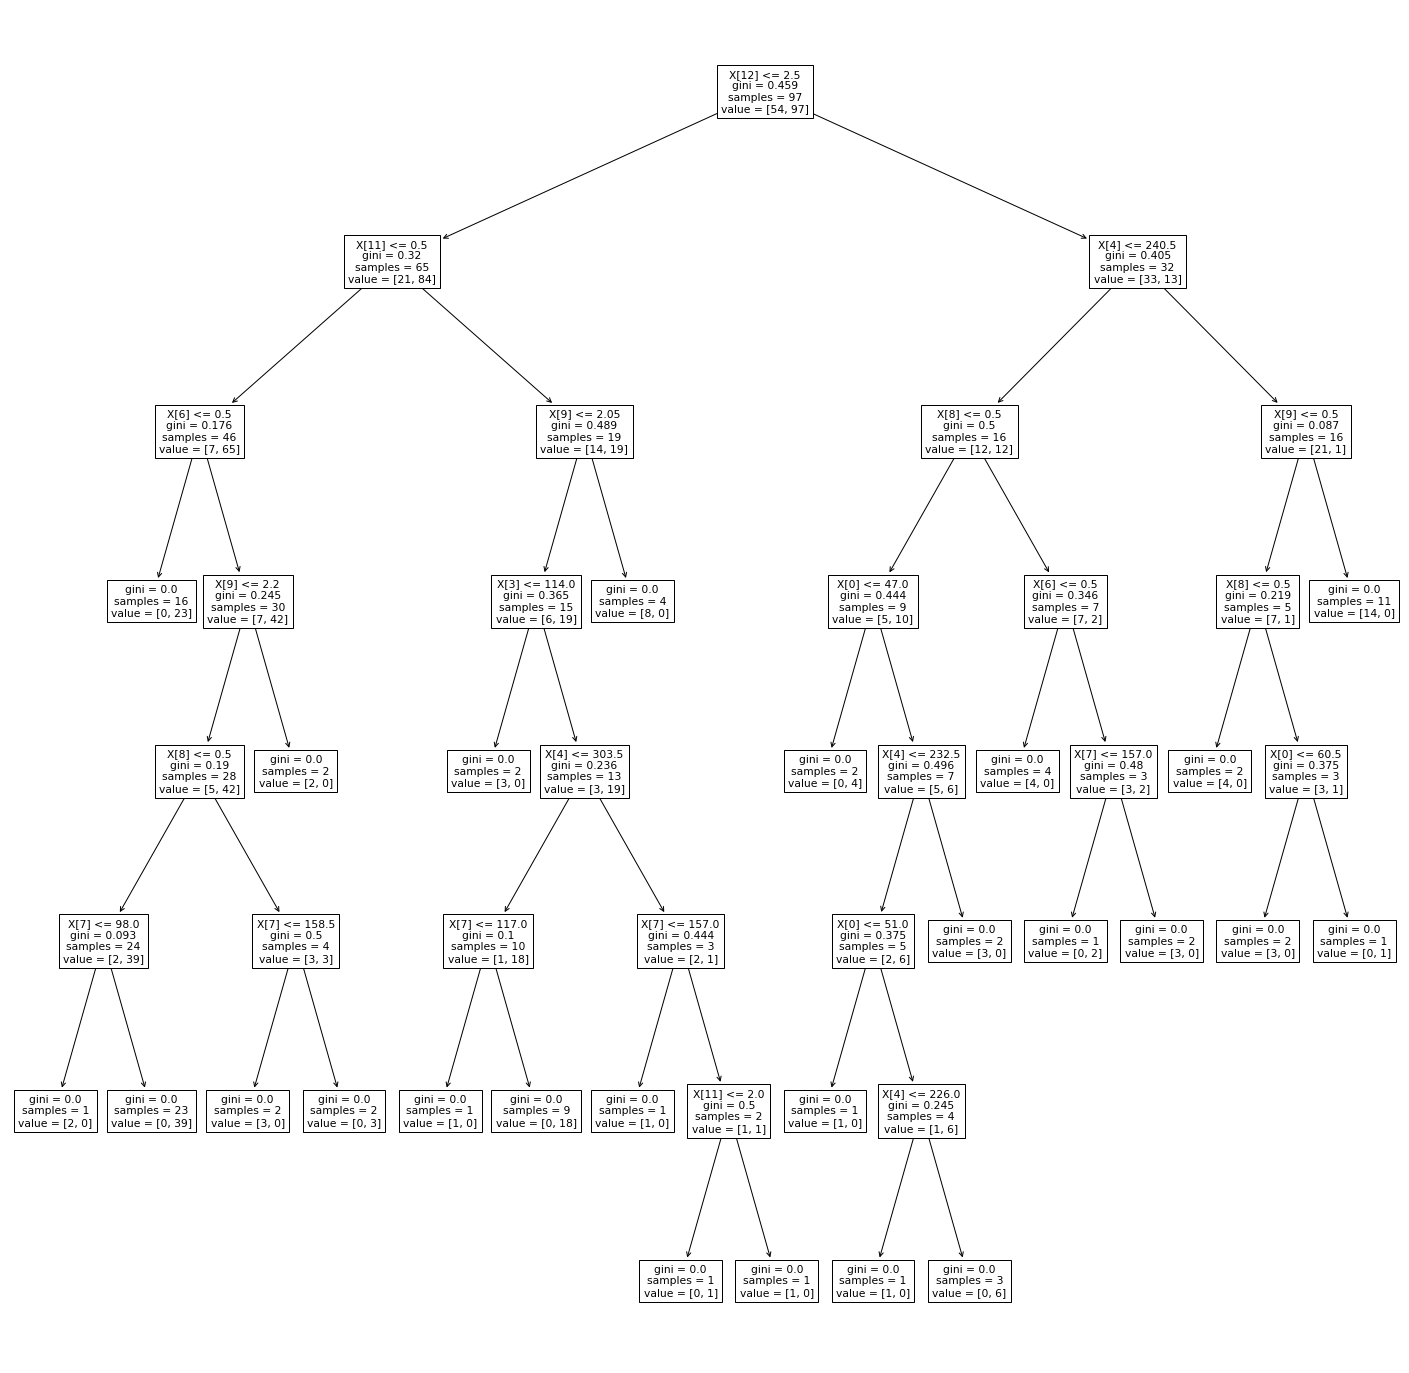

In [10]:
plt.figure(figsize=(25,25))
_= sklearn.tree.plot_tree(rf.estimators_[5])

In [11]:
rf.predict(X_test)

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1])

In [12]:
sklearn.metrics.f1_score(y_test, rf.predict(X_test))

0.7852760736196319

In [13]:
n_trees = np.arange(1,100,1)
f1_train = []
f1_test = []
feature_importance = np.zeros((len(n_trees), len(predictors)))

for i, n_tree in enumerate(n_trees):
    rf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_tree, max_features='sqrt')
    rf.fit(X_train, y_train)
    f1_train.append(sklearn.metrics.f1_score(y_train, rf.predict(X_train)))
    f1_test.append(sklearn.metrics.f1_score(y_test, rf.predict(X_test)))
    feature_importance[i, :] = rf.feature_importances_

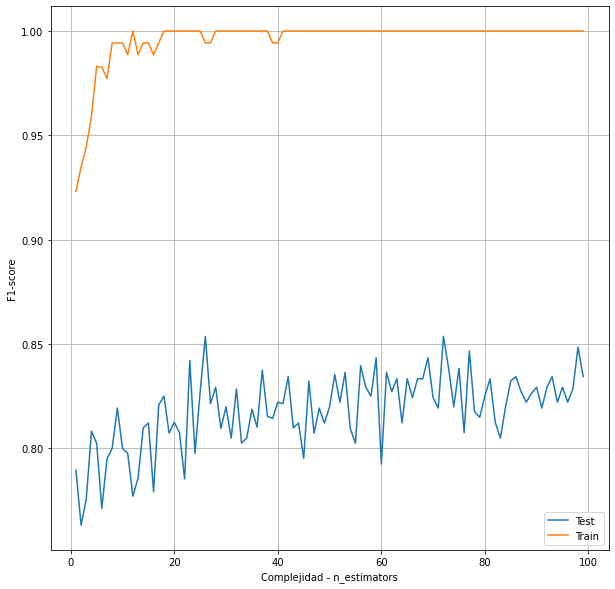

In [14]:
fig = plt.figure(figsize=(10,10))
plt.plot(n_trees, f1_test, label='Test')
plt.plot(n_trees, f1_train, label='Train')
plt.grid()
plt.legend()
plt.xlabel('Complejidad - n_estimators')
plt.ylabel('F1-score')
plt.show()

In [15]:
n_trees = np.arange(1,20,1)
f1_train = []
f1_test = []
feature_importance = np.zeros((len(n_trees), len(predictors)))

for i, n_tree in enumerate(n_trees):
    clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_tree, max_features='sqrt')
    clf.fit(X_train, y_train)
    f1_train.append(sklearn.metrics.f1_score(y_train, clf.predict(X_train)))
    f1_test.append(sklearn.metrics.f1_score(y_test, clf.predict(X_test)))
    feature_importance[i, :] = clf.feature_importances_

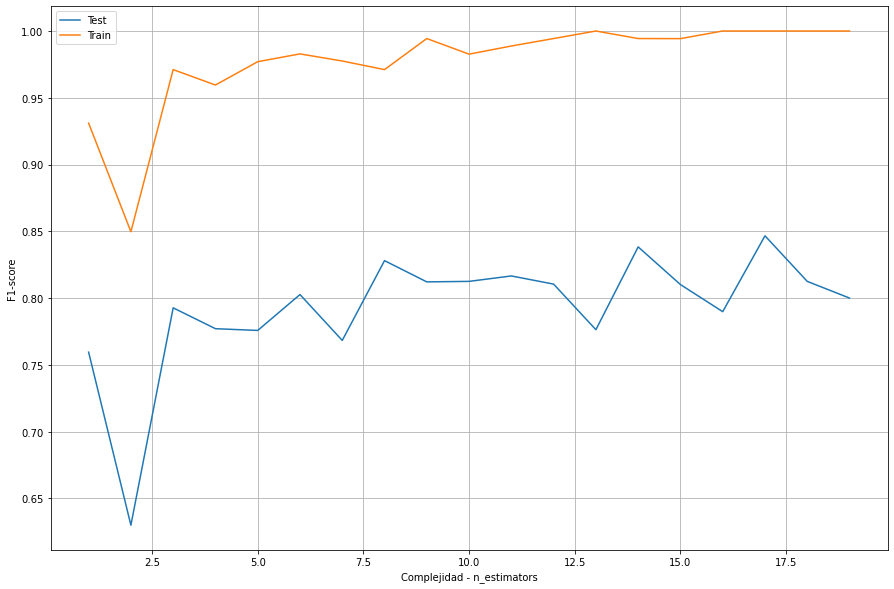

In [16]:
fig = plt.figure(figsize=(15,10))
plt.plot(n_trees, f1_test, label='Test')
plt.plot(n_trees, f1_train, label='Train')
plt.grid()
plt.legend()
plt.xlabel('Complejidad - n_estimators')
plt.ylabel('F1-score')
plt.show()

age         0.090464
sex         0.018228
cp          0.169004
trtbps      0.058271
chol        0.075526
fbs         0.007015
restecg     0.019910
thalachh    0.128477
exng        0.098841
oldpeak     0.115231
slp         0.030831
caa         0.089201
thall       0.099003
dtype: float64


Text(0.5, 0, 'Average Feature Importance')

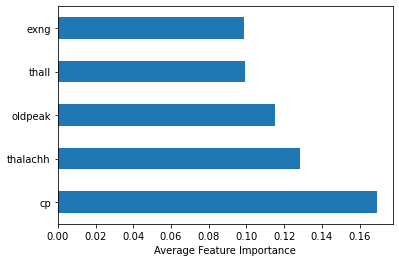

In [17]:
# Grafica los features mas importantes
avg_importance = np.average(feature_importance, axis=0)
a = pd.Series(avg_importance, index=predictors)
print(a)
a.nlargest().plot(kind='barh')
plt.xlabel('Average Feature Importance')

### Grid Search, Cross-Validation

In [18]:
from sklearn.model_selection import GridSearchCV

rf = sklearn.ensemble.RandomForestClassifier()
print(len(X_train))
parameters = {'n_estimators':np.arange(1,100,20), 'max_samples':[20,10,5], 'max_features':['sqrt',10,5]}

gscv = GridSearchCV(cv=5,estimator=rf, param_grid=parameters, scoring='f1')
gscv

151


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 10, 5],
                         'max_samples': [20, 10, 5],
                         'n_estimators': array([ 1, 21, 41, 61, 81])},
             scoring='f1')

In [19]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 10, 5],
                         'max_samples': [20, 10, 5],
                         'n_estimators': array([ 1, 21, 41, 61, 81])},
             scoring='f1')

In [20]:
gscv.best_score_, gscv.best_params_

(0.8894793953617484,
 {'max_features': 10, 'max_samples': 10, 'n_estimators': 21})

In [21]:
gscv.cv_results_

{'mean_fit_time': array([0.00641394, 0.0192399 , 0.03278003, 0.04725504, 0.06290884,
        0.00219603, 0.01740341, 0.03345704, 0.04803648, 0.06156135,
        0.0021471 , 0.016993  , 0.03385034, 0.04934978, 0.06182866,
        0.00222764, 0.01725969, 0.03232737, 0.04763732, 0.06313696,
        0.00224261, 0.01701312, 0.03206038, 0.04704752, 0.0620275 ,
        0.00249343, 0.01807213, 0.03185797, 0.04680681, 0.06099658,
        0.00231872, 0.01717367, 0.03157177, 0.04644222, 0.06191568,
        0.00238614, 0.01741395, 0.03092914, 0.04595613, 0.06060028,
        0.00212297, 0.01750927, 0.03135223, 0.04563766, 0.06086988]),
 'std_fit_time': array([3.55806190e-03, 2.67242027e-03, 7.60669664e-04, 6.82364320e-04,
        7.52987406e-04, 7.36484832e-05, 5.56208653e-04, 1.99085805e-03,
        1.53219543e-03, 2.66921201e-04, 4.26481725e-05, 1.38418394e-04,
        3.77996063e-03, 3.58477222e-03, 8.73099233e-04, 8.35365899e-05,
        2.22992049e-04, 2.42538495e-04, 6.84625841e-04, 1.2127743